# W261  MIDS Machine Learning at Scale  
## End of Term exam  

Fall, 2017  
__Student Name__:  Victoria Baker

__Student ID:__   3032501083

__Email:__   victoria.baker@ischool.berkeley.edu

# Exam Schedule  (All times are in California Time)

One week starting 1:00AM PST, Thursday, December 7th, 2017



# Instructions for exam 


* Please keep all your work and responses in ONE (1) notebook only (and submit to your github repository in a directory named FINAL)

* Please submit your solutions and notebook via ISVC. Go to: Coursework -> Assignments & Grading -> End of Term Exam

* **As for question types:** 
*    Knowledge test Programmatic/doodle (take photos; embed the photos in your notebook) and put them on GitHub
*    All programmatic questions can be run locally on your laptop (using Apache Spark only)

* This is an open book exam meaning you can consult webpages and textbooks, class notes, slides etc. but you can not discuss with each other or any other person/group until after December 19, 2017 

* If there is any collusion, then this will result in a zero grade and will be grounds for dismissal from the entire program for those involved. Please complete this exam by yourself within the time limit.

7. For markdown help in iPython Notebooks please see:
https://sourceforge.net/p/ipython/discussion/markdown_syntax



# Exam helper functions:

### Questions requiring a SINGLE numeric response

In [1]:
import numpy as np
# for two decimal places; 
# change this to the desired precision as needed
ans=3.145  #replace with your answer
print("%.2f"%np.round(ans, 2))
#prints 3.14
#if this was your response then paste 3.14 (no spaces before or after; no extra characters; just 4 character: 3, ., 1, 14)

3.14


### Questions requiring a MULTIPLE numeric responses

In [2]:
import numpy as np
# for two decimal places; 
# change this to the desired precision as needed
ans1=1.145  #replace with your answer
ans2=2.44333
ans3=3.444443
print("%.2f,%.2f,%.2f" %(np.round(ans1, 2), np.round(ans2, 2), np.round(ans3, 2)))
#prints 1.14,2.44,3.44
#if this was your response then paste this string 1.14,2.44,3.44 (no spaces before or after; no extra characters)

1.14,2.44,3.44


In [3]:
import os
import sys
spark_home = os.environ['SPARK_HOME'] = '/usr/lib/spark'
if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.9-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.6.0
      /_/

Using Python version 2.7.13 (default, Dec 20 2016 23:09:15)
SparkContext available as sc, HiveContext available as sqlContext.


# Exam questions begins here

##  ET:1
Calculate the signed normalizaed perpendicular distance from hyperplane $4x + 3y = 2$ to the point $(1, 3)$
Please provide a response  within two decimal digits of precision in your notebook the submission form.


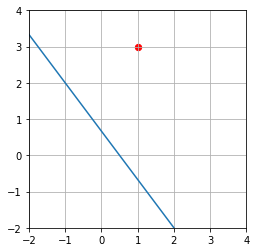

In [4]:
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-2, 5)
plt.plot(x, (2. - 4. * x) / 3.)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter([1],[3], c="r", s=40)
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.grid("on")
plt.show()

In [5]:
plane = [4,3,-2]
point = [1,3]

normalVector = plane[:-1]
normalVector_magnitude = np.sqrt(np.dot(normalVector, normalVector))
normalUnitVector = normalVector / normalVector_magnitude

shortestDistance = np.abs(np.dot(plane, point + [1])) / normalVector_magnitude
signed_shortestDistance = np.dot(plane, point + [1]) / normalVector_magnitude

print("%.2f"%np.round(signed_shortestDistance, 2))

2.20


**Answer**: 2.20

## ET:2
Consider a three-class classification problem with the following separating hyperplanes:

$$
\begin{align}
4x + 3y - 9 = 0 & & 1^{\text{st}} \text{ class}\\
-4x + 3y - 11 = 0 & & 2^{\text{nd}} \text{ class}\\
-x - 3y - 1 = 0 & & 3^{\text{rd}} \text{ class}
\end{align}
$$

Calculate the score (signed unnormalized perpendicular distance) for each class and the point (0, 1).

As a response provide all class scores within two decimal digits precision.   
Provide your response in your notebook here and in the submission form.   
Use the above provided helper functions to format your answers.   

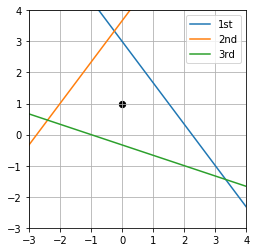

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
x = np.arange(-3, 5)
plt.plot(x, (9. - 4. * x) / 3., label="1st")
plt.plot(x, (11. + 4. * x) / 3., label="2nd")
plt.plot(x, (-1. - 1. * x) / 3., label="3rd")
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter([0], [1], c="k", s=40)
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.legend()
plt.grid("on")
plt.show()

In [20]:
plane1 = [4,3,-9]
plane2 = [-4,3,-11]
plane3 = [-1,-3,-1]
point = [0,1]

v1 = plane1[:-1]
v1_mag = np.sqrt(np.dot(v1, v1))
v2 = plane2[:-1]
v2_mag = np.sqrt(np.dot(v2, v2))
v3 = plane3[:-1]
v3_mag = np.sqrt(np.dot(v3, v3))

shortestDistance1 = abs(np.dot(plane1, point + [1]) / v1_mag)
shortestDistance2 = abs(np.dot(plane2, point + [1]) / v2_mag)
shortestDistance3 = abs(np.dot(plane3, point + [1]) / v3_mag)

print("%.2f,%.2f,%.2f" %(np.round(shortestDistance1, 2), np.round(shortestDistance2, 2), np.round(shortestDistance3, 2)))

1.20,1.60,1.26


**Answer**: 1.20, 1.60, 1.26

##  ET:3
Take the data from question ET2  above and calculate the class conditional probabilities for the point (0, 1) with respect to each class in this multinomial logistic regression model.


As a response provide all class conditional probabilities within **five** decimal digits precision.   
Use the helper functions above to format your answer. Make sure to adjust it to produce 5 decimal precision digits.

In [8]:
import math

e1 = math.exp(shortestDistance1)
e2 = math.exp(shortestDistance2)
e3 = math.exp(shortestDistance3)

eSum = e1 + e2 + e3

prob1 = e1 / eSum
prob2 = e2 / eSum
prob3 = e3 / eSum
print("%.5f,%.5f,%.5f" %(np.round(prob1, 5), np.round(prob2, 5), np.round(prob3, 5)))

0.28099,0.41918,0.29983


**Answer**: 0.28099, 0.41918, 0.29983

##  ET:4
Take the data from question ET3 above and predict the right class using the above multinomial logistic regression model.

Select the correct response from the following.


(a) Class 1     
(b) Class 2     
(c) Class 3     
(d) all classes are equally likely


**Answer**: B

##  ET:5
In the following (and also referring to HW12: http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/1wb2rdqbet54y1h/MIDS-MLS-Project-Criteo-CTR.ipynb) we have hashed the three sample points using numBuckets=4 and numBuckets=100. Complete the  statement below about these hashed features summarized in the following table using each answer once.

|Name|Raw Features|4 Buckets|100 Buckets|
|--|--|--|--|
|sampleOne|[(0, 'mouse'), (1, 'black')]|{2: 1.0, 3: 1.0}|{14: 1.0, 31: 1.0}|
|sampleTwo|[(0, 'cat'), (1, 'tabby'), (2, 'mouse')]|{0: 2.0, 2: 1.0}|{40: 1.0, 16: 1.0, 62: 1.0}|
|sampleThree|[(0, 'bear'), (1, 'black'), (2, 'salmon')|{0: 1.0, 1: 1.0, 2: 1.0}|{72: 1.0, 5: 1.0, 14: 1.0}|

With 4 buckets, sampleTwo and sampleThree both contain index 0 due to __________.

(a) A hash collision  
(b) Underlying properties of the data  
(c) The fact that we use 4 buckets  
(d) none of the above


**Answer**: A

##  ET:6  
When applying numerical machine learning approaches (and for non-numerical approaches if required) to big data problems which of the following steps are could be used during modeling and are recommended:

Select one:   
(a) Convert categorical features to numerical features via one-hot-encoding and store in a dense representation  
(b) Transform  categorical features using hashing regardless of how many unique categorical values exist in training and test data  
(c) Use matrix factorization to remap your input vectors to latent concepts  
(d) none of the above  

**Answer**: C

##  ET:7
When dealing with numercial data which of the following are ways to deal with missing data:

Select one:   
(a) Delete records that have missing input values  
(b) Standardize the data and set all missing values to 1 (one)  
(c) Use K-nearest neighbours based on the test set to fill in missing values in the training set  
(d) none of the above

**Answer**: A

##  ET:8
In the Criteo project, we're trying to predict what:

Select one:   
(a) Revenue from click events  
(b) Click-through vs not click event  
(c) Probability of a purchase  
(d) none of the above  

**Answer**: B

##  ET:9
Which of the following are true about the purpose of a loss function?

Select one or more:   
(a) It’s a way to penalize a model for incorrect predictions  
(b) It precisely defines the optimization problem to be solved for a particular learning model  
(c) Loss functions can be used for modeling both classification and regression problems  
(d) none of the above

**Answer**: A, B, C

##  ET:10
Many standard machine learning methods can be formulated as a convex optimization problem, i.e. the task of finding a minimizer of a convex function _f_ that depends on a variable vector __w__ (called weights in the code), which has _d_ entries. Formally, we can write this as the optimization problem min<sub>w∈ℝ<sup>d</sup></sub>f(w), where the objective function is of the form  (JGS)

\begin{equation*}
minimize   \left(f(w):= λR(w) + \sum_{k=1}^n \left(w;w_i,y_i \right) \right) 
\end{equation*}

Here the vectors x<sub>i</sub>∈ℝ<sup>d</sup> are the training data examples, for 1≤i≤n, and y<sub>i</sub>∈ℝ are their corresponding labels, which we want to predict. We call the method linear if _L(w;x,y)_ can be expressed as a function of _ __w<sup>T</sup>__x _ and y. Several of spark.mllib’s classification and regression algorithms fall into this category.

The objective function __f__ has two parts: the regularizer that controls the complexity of the model, and the loss that measures the error of the model on the training data. The loss function _L(w;.)_ is typically a convex function in __w__. The fixed regularization parameter λ≥0λ≥0 (regParam in the code) defines the trade-off between the two goals of minimizing the loss (i.e., training error) and minimizing model complexity (i.e., to avoid overfitting).


When implementing Logistic (or linear) Regression with Regularization in Spark which of the following apply when using the above cost functions (mulitple options may apply): 

(I)   When lambda equals one, it provides the same result as standard logistic/linear regression   
(II)  One only needs to modify the standard logistic (linear) regression (i.e., with no regularization term) by adding some code after the map-reduce (loss) gradient steps    
(III) When lambda equals zero, it provides the same result as standard logistic (linear) regression 
(IV)  None of the above

Select the most correct from the following:

* (a) I, II, III
* (b) II, III
* (c) III
* (d) IV

**Answer**: C -- III is definitely true, but I don't think that II is. I think the regularization term needs to be defined & broadcasted before the gradient steps-- more like in the mapping phase. 

##  ET:11
In the context of ecommerce you have just deployed a new conversion rate prediction model to production. This model (aka treatment model) will challenge the control nodel (i.e., the current model) in AB Test manner to see if it can be produce better revenue. Here is the data that was taken from this live AB Test. 

```
CONTROL MODEL (our new CTR model)
Impression ID   Revenue  
1                $0.50
2                $0.50
3                $3.00
......               
20000            $3.00
20001            $3.00
20002            $3.00
20003            $3.00
......
50,001           $3.00
.....
100,000          $4.00
```

All other impressions in this 100,000 sample resulted in zero transactions and therefore zero revenue. 

```
TREATMENT MODEL (our new CTR model)
Impression ID   Revenue  
1                $1.50
2                $0.50
3                $0.00
......
50,001           $3.00
.....
100,000          $4.00
```
All other impressions in this 100,000 sample resulted in zero transactions and therefore zero revenue. 


P-values are a common way to determine the statistical significance of a test. The smaller it is, the more confident you can be that the test results are due to something other than random chance.
A common p-value of .05 is a 5% significance level. Similarly, a p-value of .01 is a 1% significance level. A p-value of .20 is a 20% significance level. For this problem set the p-value to 0.01


Which of the following are true:

(a) Based on revenue there is no statistical significant difference between the Control and the Treatment at p-value of 0.05 for a one-sided t-test  
(b) Based on transaction rates (tranactions that generated revenue versus not) there is no statistical significant difference between the Control and the Treatment at p-value of 0.05 for a one-sided t-test  
(c) AB testing using differences in revenue for this problem is a  useful means of determining if the Treatment conversion rate prediction model is better than the control model.  
(d) none of the above

In [9]:
import numpy as np
from scipy.sparse import coo_matrix
import scipy.stats

control=[.5, .5, 3, 3, 3, 3, 3, 3, 4]
control.extend([0]*(100000-len(control)))
control=np.asarray(control)

treatment=[ 1.5, .5, 3, 4]
treatment.extend([0]*(100000-len(treatment)))
treatment=np.asarray(treatment)

#nb 2-sided test
scipy.stats.ttest_ind(control, treatment), scipy.stats.ttest_ind(control.astype(bool), treatment.astype(bool))

(Ttest_indResult(statistic=1.4142505069117979, pvalue=0.15728991985619109),
 Ttest_indResult(statistic=1.3867952958906298, pvalue=0.1655057375790788))

**Answer**:  D -- The image shown in the online exam does not match the results of the code I am seeing in this notebook, so I am electing to answer based on the information in this notebook. The scipy.stats.ttest library runs a two sided t-test, not one-sided. The p values are higher than 0.05, so I can't certainly say there is any statistical significance. It would also lead me to believe that this kind of testing might not be the best way since all we can say is that we fail to reject the null hypothesis.

##  ET:12
Given this graph expressed in the form of an adjacency list,

```
Node  adjacentNode:weightAssociatedWithEdge
N1    N6:10,  N2:2
N2    N3:1
N3    N4:1
N4    N5:1
N5    N6:1
N6    N7:1
N7    N8:1
N8    N9:1
```

Using the parallel breadth-first search algorithm for determining the shortest path from a single source, how many iterations are required to discover the shortest distances to all nodes from Node 1 

A 7   
B 8    
C 13  
D None of the above

**Answer**: B

##  ET:13 
Many standard machine learning methods can be formulated as a convex optimization problem, i.e. the task of finding a minimizer of a convex function f that depends on a variable vector w (called weights in the code), which has d entries. Formally, we can write this as the optimization problem where the objective function is of the form
 <img src="softSVM.png"/>
 
$$
f(w):= λR(w) + \frac{1}{n}\sum_{i=1}^n L\left(w;w_i,y_i \right) 
$$
 
 
Here the vectors $x_i \in ℝ_d$ are the training data examples, for $1≤i≤n$, and $y_i \in ℝ$ are their corresponding labels, which we want to predict.    

We call the method linear if $L(w;x,y)$ can be expressed as a function of $wTx$ and $y$. (where $wT$ denotes the transpose of the weight vector or matrix w )   

By default, linear SVMs are trained with an L2 regularization with a hinge loss that is defined as follows:  $max\{0,1−ywTx\},y \in \{−1,+1\}$

Given the a softSVM as defined above select the most correct combination of statements from the following:   

(I) When λ is super small (e.g., 0.000001), then the above Langrangian will yield a Hard SVM approximately   
(II) In the context of support vector machines, linear kernels can be readily parallelized in map reduce frameworks such as Spark   
(III) Sequential learning via algorithms such as perceptron can take advantage of map-reduce frameworks and yield   exactly the same results as a single core implementation with significant reductions in training time   
(IV) When λ is 1.0, then the above Langrangian will yield a Soft SVM    

Select one:

(a) I, II, III   
(b) I, III, IV   
(c) I, II, IV   
(d) none of the above statements are correct   

**Answer**: C -- I & II are true. I'm hesitant to say that III is true because I don't think it's guaranteed to reduce training time, much less significantly reduce it. That's a pretty strong statement.

##  ET:14 
Given the following paired RDDs 
RDD1 = {(1, 2), (3, 4), (3, 6)}
RDD2 = {(3, 9) (3, 6)}

Using PySpark, write code to perform an inner join of these paired RDDs. What is the resulting RDD? Make your Spark available in your notebook:

A: [(3, (4, 9)), (3, (6, 9))]  
B: [(3, (4, 9)), (3, (4, 6)), (3, (6, 9)), (3, (6, 6))]  
C: [(3, (4, 9)), (3, (4, 6)), (3, (6, 9)), (3, (6, 9))]  
D: None of the above

In [10]:
RDD1 = sc.parallelize([(1, 2), (3, 4), (3, 6)])
RDD2 = sc.parallelize([(3, 9), (3, 6)])
print RDD1.join(RDD2).collect()

[(3, (4, 9)), (3, (4, 6)), (3, (6, 9)), (3, (6, 6))]


**Answer**: B

##  ET:15  
You have been tasked to build a predictive model to forecast beer sales for a chain of stores.
After doing basic exploratory analysis on the data, what is the first thing you do regarding modeling?

Select one:   
(a) Construct a baseline model  
(b) Determine a metric to evaluate your machine learnt models  
(c) Split your data into training, validation and test subsets (or split using cross fold validatation)  
(d) All of the  of the above

**Answer**: D 

##  ET:16 
Use Spark and the following notebook to answer this question:

* http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/6s5ph41h74bggwi/Linear-Regression-on-Beer-Data.ipynb
* https://www.dropbox.com/s/6s5ph41h74bggwi/Linear-Regression-on-Beer-Data.ipynb?dl=0 

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a model for say a forecasting method in statistics, 
for example in trend estimation. It usually expresses accuracy as a percentage, and is defined by the formula:

MAPE = average over all examples (100*Abs(Actual - Predicted) / Actual)) 

Note when Actual is zero that test row is dropped from the evaluation.

Construct a mean model for target variable `CASES18PK`. Calculate the MAPE for the mean model over the training set. Select the closest answer.

Select one:   
(a) 200%  
(b) 250%  
(c) 20%  
(d) 180%

In [11]:
%%writefile beerSales.txt
Week	PRICE12PK	PRICE18PK	PRICE30PK	CASES12PK	CASES18PK	CASES30PK
1	19.98	14.10	15.19	223.5	439	55.00
2	19.98	18.65	15.19	215.0	98	66.75
3	19.98	18.65	13.87	227.5	70	242.00
4	19.98	18.65	12.83	244.5	52	488.50
5	19.98	18.65	13.16	313.5	64	308.75
6	19.98	18.65	15.19	279.0	72	111.75
7	19.98	18.65	13.92	238.0	47	252.50
8	20.10	18.73	14.42	315.5	85	221.25
9	20.12	18.75	13.83	217.0	59	245.25
10	20.13	18.75	14.50	209.5	63	148.50
11	20.14	18.75	13.87	227.0	57	229.75
12	20.12	18.75	13.64	216.5	54	312.00
13	20.12	13.87	14.31	169.0	404	96.75
14	20.13	14.27	13.85	178.0	380	123.25
15	20.14	18.76	14.20	301.5	65	200.50
16	20.14	18.77	13.64	266.5	40	359.75
17	20.13	13.87	14.33	182.5	456	113.50
18	20.13	14.14	13.14	159.0	176	136.50
19	20.13	18.76	13.81	285.5	61	225.50
20	20.13	18.72	15.19	360.0	91	122.25
21	20.13	18.76	13.13	263.0	59	443.75
22	19.18	18.76	13.63	443.5	83	322.75
23	14.78	18.74	15.19	1101.5	41	53.00
24	16.04	18.75	13.89	814.0	47	140.75
25	20.12	18.75	14.28	365.0	84	210.75
26	19.75	18.75	15.19	510.0	85	110.50
27	19.65	18.75	13.12	580.5	116	568.25
28	19.69	13.79	13.78	251.0	544	115.50
29	20.12	13.49	15.19	237.0	890	58.75
30	20.12	14.89	15.19	302.5	371	77.25
31	20.13	13.94	15.19	229.5	557	66.25
32	20.14	13.67	15.19	188.5	775	50.00
33	15.14	14.43	15.19	795.5	236	46.50
34	14.33	18.75	15.19	1556.5	43	65.75
35	16.24	18.22	13.14	807.5	63	252.75
36	19.93	14.06	13.45	243.0	469	179.00
37	21.06	14.43	13.00	201.5	335	226.25
38	21.19	19.48	13.60	294.0	75	288.50
39	21.23	15.15	14.46	220.5	461	114.25
40	20.12	13.79	14.94	255.5	817	70.00
41	14.73	14.31	15.19	920.5	200	47.75
42	14.57	19.50	15.19	730.0	32	98.75
43	15.94	13.85	15.19	262.5	460	77.00
44	20.70	14.23	13.43	209.5	751	160.50
45	19.57	19.31	14.37	283.0	70	143.50
46	19.60	19.29	15.19	262.5	80	133.00
47	19.94	13.76	15.19	310.0	523	68.75
48	21.28	13.45	15.19	278.5	741	81.75
49	14.56	15.13	15.19	741.5	130	56.25
50	14.39	19.43	15.19	1316.0	69	68.75
51	16.81	13.26	15.19	449.0	493	49.25
52	19.86	13.92	15.19	505.0	814	76.50

Writing beerSales.txt


In [12]:
df = sc.textFile("beerSales.txt")

In [13]:
!hdfs dfs -copyFromLocal beerSales.txt

In [14]:
cases18pk = sc.textFile("beerSales.txt") \
            .filter(lambda x: not x.startswith("Week")) \
            .map(lambda x: int(x.split("\t")[5])) \
            .cache()

mean_model = cases18pk.mean()
mape = cases18pk.map(lambda x: 100*abs(x-mean_model)/x).mean()
print mape

200.44422333


**Answer**: A

##  ET:17
Use Spark and the following notebook to answer this question:

* http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/6s5ph41h74bggwi/Linear-Regression-on-Beer-Data.ipynb
* https://www.dropbox.com/s/6s5ph41h74bggwi/Linear-Regression-on-Beer-Data.ipynb?dl=0 

The target variable `CASES18P`K is skewed, so take the log of it (and make it more normally distributed) and compute the MAPE of the mean model for `CASES18PK`. Select the closest answer to your calculated MAPE.

(a) 200%  
(b) 30%  
(c) 20%  
(d) 10%

In [15]:
from math import log

log18pk = cases18pk.map(lambda x: log(x)).cache()

mean_model = log18pk.mean()
mape = log18pk.map(lambda x: 100*abs(x-mean_model)/x).mean()
print mape

19.5849342896


**Answer**: C

##  ET:18
Use Spark and the following notebook to answer this question:

* http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/6s5ph41h74bggwi/Linear-Regression-on-Beer-Data.ipynb
* https://www.dropbox.com/s/6s5ph41h74bggwi/Linear-Regression-on-Beer-Data.ipynb?dl=0 


Build a linear regression model using the following variables:

Log(CASES18PK)  ~  log(PRICE12PK), 	log(PRICE18PK),	log(PRICE30PK)

Please train the model on the full data and calculate  the MAPE over the same dataset and select a response from the following options that is closest this MAPE". 

Select one:   
(a) 4.3%  
(b) 4.6%  
(c) 3.5%  
(d) 3.9%

In [19]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

header = ['Week',
          'PRICE12PK',
          'PRICE18PK',
          'PRICE30PK',
          'CASES12PK',
          'CASES18PK',
          'CASES30PK']

xTemp = sc.textFile("beerSales.txt") \
             .map(lambda x: x.split("\t")) \
             .filter(lambda x: x[0] != "Week") \
             .map(lambda x: [float(val) for val in x])

x = np.log(pd.DataFrame(xTemp.collect(), columns=header))
y = x.pop("CASES18PK")
x.drop(["CASES12PK", "CASES30PK", "Week"], axis=1, inplace=True)

model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

(100*(y - y_hat).abs()/y).mean()

4.2150866635659208

**Answer**: A

## ET:19
Recall that Spark automatically sends all variables referenced in your closures to the
worker nodes. While this is convenient, it can also be inefficient because (1) the
default task launching mechanism is optimized for small task sizes, and (2) you
might, in fact, use the same variable in multiple parallel operations, but Spark will
send it separately for each operation. As an example, say that we wanted to write a
Spark program that looks up countries by their call signs (e.g., the call sign for Ireland is EJZ) by prefix matching in an
table. In the following the "signPrefixes" variable is essentially a table with two columns "Sign" and "Country Name". The goal is 
to join the following tables:

`signPrefixes` table with columns "Sign" and "Country Name"  
`contactCounts` table with columns "Sign" and "count"

to yield  a new table:

`countryContactCounts` with the following columns "Country Name" and "count"

Use Spark and the following notebook to answer this question:

* http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/6s5ph41h74bggwi/Linear-Regression-on-Beer-Data.ipynb
* https://www.dropbox.com/s/6s5ph41h74bggwi/Linear-Regression-on-Beer-Data.ipynb?dl=0 


How can we modfify this code to make it more efficient? Choose one response only

(a) modify line 18 with `sc.broadcast(loadCallSignTable())`
(b) Use accumulators to store the counts for each country  
(c) The code is already optimal  
(d) none of the above

**Answer**: A     